In [1]:
import pandas as pd
import os
import time
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
train = pd.read_csv("../data/train_small.csv")

#cols = ['age','roomservice', 'spa', 'vrdeck', 'homeplanet_earth', 'homeplanet_europa', 'homeplanet_mars', 'target']

#train = train[cols]

x_train_use, y_train_use = train.drop("target", axis = 1), train["target"]

x_train, x_val, y_train, y_val = train_test_split(x_train_use, y_train_use, train_size=0.8, random_state = 42)

x_train=np.array(x_train)
y_train=np.array(y_train)

num_qubits=train.shape[1]-1



In [3]:
from qiskit.circuit.library import PauliFeatureMap

feature_map = PauliFeatureMap(feature_dimension=num_qubits, reps=1)

from qiskit_machine_learning.algorithms import QSVC

from qiskit import BasicAer
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.kernels import FidelityQuantumKernel



algorithm_globals.random_seed = 12345

qkernel = FidelityQuantumKernel(feature_map=feature_map)
model = QSVC(quantum_kernel=qkernel)

#start = time.time()
#model.fit(x_train, y_train)
#elapsed = time.time() - start
#train_score=model.score(x_train, y_train)
#qsvc_score = model.score(x_val, y_val)

x_train_use=np.array(x_train_use)
y_train_use=np.array(y_train_use) 


In [4]:

start = time.time()
print("Training commences!!!")
model.fit(x_train_use, y_train_use)
elapsed = time.time() - start
print("Training has finished", elapsed)

print("Prediction begins")
pred_use = model.predict(x_train_use)
print("End of prediction")

f1_train = f1_score(y_train_use, pred_use)
prec_train = precision_score(y_train_use, pred_use)
recall_train = recall_score(y_train_use, pred_use)


Training commences!!!
Training has finished 10798.149188995361
Prediction begins
End of prediction


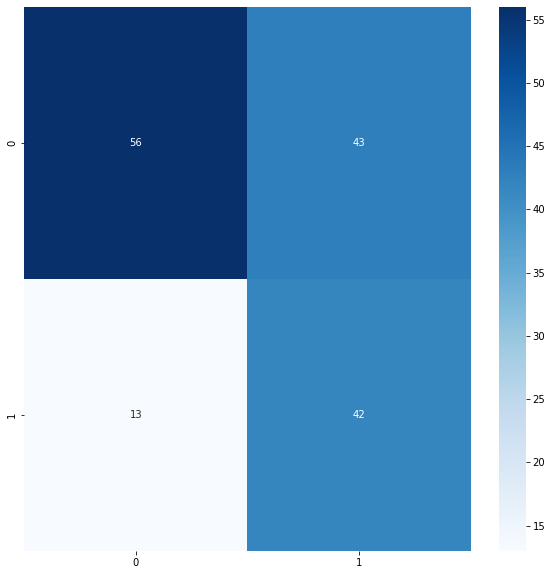

In [5]:

test = pd.read_csv("../data/test_fe.csv")

#test = test[cols]

x_test, y_test = test.drop("target", axis =1), test["target"]

pred_test = model.predict(x_test)

f1_test = f1_score(y_test, pred_test)
prec_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)

conf = confusion_matrix(y_test, pred_test)

plt.figure(figsize=(10,10))
sns.heatmap(conf, annot=True, cmap="Blues")
#plt.show();
plt.savefig("../conf/qsvc.png")

df = pd.DataFrame()
df["f1_test"] = [f1_test]
df["f1_train"] = f1_train
df["prec_train"] = prec_train
df["prec_test"] = prec_test
df["recall_train"] = recall_train
df["recall_test"] = recall_test
df["model"] = "QSVC"
df["elapsed"] = elapsed

qsvc_mod_num = "../model/mod_qsvc_pauli.model"
model.save(qsvc_mod_num)

df.to_csv("../results/regular/qsvc.csv", index = False)  